# Embedding con GloVe

### Carga del embeding

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

D:\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
glove_embeddings = {}

with open('glove.840B.300d.txt', encoding='utf-8') as f:
    for line in f:
        try:
            line = line.split()
            glove_embeddings[line[0]] = np.array(line[1:], dtype=np.float32)
        except:
            continue

In [14]:
glove_embeddings['monitor'].shape

(300,)

In [69]:
ng_20 = pd.read_csv('20newsgroups_all.csv')

ng_20.head()

,id_documento,Grupo,Documento,Target
0,54367,rec.sport.hockey,basher pen fan pretty confused lack kind post ...,10
1,60215,comp.sys.ibm.pc.hardware,brother market high performance video card sup...,3
2,76120,talk.politics.mideast,finally dream mediterranean area great year ho...,17
3,60771,comp.sys.ibm.pc.hardware,scsi card dma transfer disk scsi card dma tran...,3
4,51882,comp.sys.mac.hardware,jasmine drive understanding upsate driver mode...,4


In [4]:
ng = ng_20.copy()

In [5]:
def texto_a_embedding(doc):
    
    doc = doc.split()
    
    word_embd = []
    for word in doc:
        if word in glove_embeddings:
            word_embd.append(glove_embeddings[word]) 
    
    if len(word_embd) == 0:
        return np.nan
    
    return np.asarray([sum(x) for x in zip(*word_embd)])/len(word_embd)

## Ateísmo vs autos

In [6]:
ng_ateauto = ng[ng['Grupo'].isin(['alt.atheism', 'rec.autos'])]

In [7]:
ng_ateauto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1706 entries, 14 to 18265
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_documento  1706 non-null   int64 
 1   Grupo         1706 non-null   object
 2   Documento     1706 non-null   object
 3   Target        1706 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 66.6+ KB


<AxesSubplot:xlabel='Grupo', ylabel='Count'>

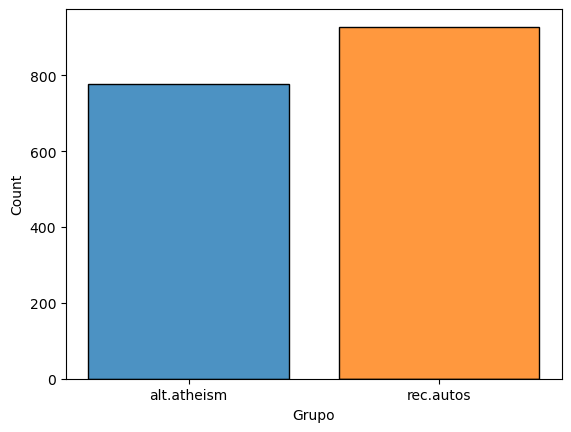

In [8]:
sns.histplot(data=ng_ateauto, x="Grupo", hue="Grupo", shrink=.8, alpha=.8, legend=False)

In [9]:
embeddings = [texto_a_embedding(doc) for doc in ng_ateauto['Documento']]

ng_ateauto['Embedding'] = embeddings

C:\Users\David\AppData\Local\Temp\ipykernel_10832\1981625575.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ng_ateauto['Embedding'] = embeddings


In [10]:
ng_ateauto[ng_ateauto['Embedding'].isnull()]

,id_documento,Grupo,Documento,Target,Embedding
3754,53401,alt.atheism,test--,0,NaN


In [11]:
ng_ateauto = ng_ateauto.drop(ng_ateauto[ng_ateauto['Embedding'].isnull()].index)

In [12]:
ng_ateauto.to_pickle('20newsgroups_ateauto_embd_all.pkl')

## Un tema de cada bloque

In [9]:
set(ng['Grupo'])

{'alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc'}

In [13]:
ng_a4 = ng[ng['Grupo'].isin(['comp.graphics', 'rec.autos', 'sci.med', 'talk.politics.guns'])]
ng_a4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3718 entries, 13 to 18265
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_documento  3718 non-null   int64 
 1   Grupo         3718 non-null   object
 2   Documento     3718 non-null   object
 3   Target        3718 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 145.2+ KB


<AxesSubplot:xlabel='Grupo', ylabel='Count'>

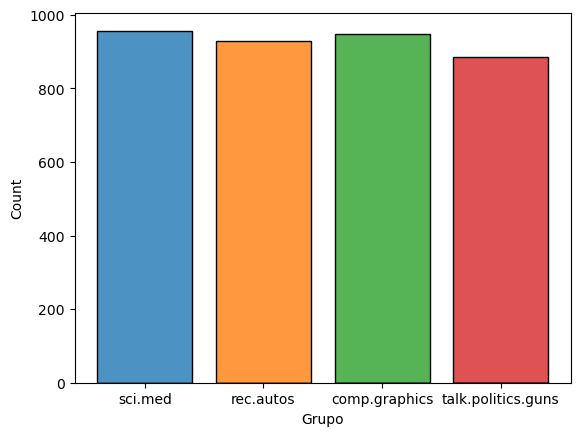

In [14]:
sns.histplot(data=ng_a4, x="Grupo", hue="Grupo", shrink=.8, alpha=.8, legend=False)

In [15]:
embeddings = [texto_a_embedding(doc) for doc in ng_a4['Documento']]

ng_a4['Embedding'] = embeddings

C:\Users\David\AppData\Local\Temp\ipykernel_10832\1664508697.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ng_a4['Embedding'] = embeddings


In [16]:
ng_a4[ng_a4['Embedding'].isnull()]

,id_documento,Grupo,Documento,Target,Embedding
13047,39623,comp.graphics,cd'ing publicationsmayonline siggraphorg,1,NaN
13174,38775,comp.graphics,spectrumxeroxcom pubmapdem,1,NaN
14936,38768,comp.graphics,qrttoppm filedi ppmtotga filetga,1,NaN


In [17]:
ng_a4 = ng_a4.drop(ng_a4[ng_a4['Embedding'].isnull()].index)

In [18]:
ng_a4.to_pickle('20newsgroups_a4_embd_all.pkl')

## B1 NG1/2/3/4/5

In [20]:
ng_b1 = ng[ng['Target'].isin([1, 2, 3, 4, 5])]

ng_b1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4758 entries, 1 to 18264
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_documento  4758 non-null   int64 
 1   Grupo         4758 non-null   object
 2   Documento     4758 non-null   object
 3   Target        4758 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 185.9+ KB


In [21]:
set(ng_b1['Grupo'])

{'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x'}

In [22]:
ng_b1.head()

,id_documento,Grupo,Documento,Target
1,60215,comp.sys.ibm.pc.hardware,brother market high performance video card sup...,3
3,60771,comp.sys.ibm.pc.hardware,scsi card dma transfer disk scsi card dma tran...,3
4,51882,comp.sys.mac.hardware,jasmine drive understanding upsate driver mode...,4
6,52099,comp.sys.mac.hardware,dallastry tech support start,4
21,68177,comp.windows.x,feature icccm specifie app set title oblige bo...,5


<AxesSubplot:xlabel='Grupo', ylabel='Count'>

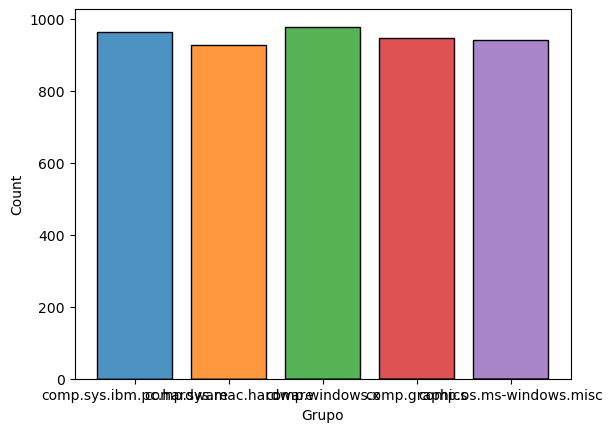

In [23]:
sns.histplot(data=ng_b1, x="Grupo", hue="Grupo", shrink=.8, alpha=.8, legend=False)

In [24]:
embeddings = [texto_a_embedding(doc) for doc in ng_b1['Documento']]

ng_b1['Embedding'] = embeddings

C:\Users\David\AppData\Local\Temp\ipykernel_10832\2604205124.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ng_b1['Embedding'] = embeddings


In [25]:
ng_b1[ng_b1['Embedding'].isnull()]

,id_documento,Grupo,Documento,Target,Embedding
1259,68274,comp.windows.x,compwindowsmisc --berry,5,NaN
5886,51689,comp.sys.mac.hardware,hdfd -david,4,NaN
12027,10635,comp.os.ms-windows.misc,emmexe,2,NaN
13047,39623,comp.graphics,cd'ing publicationsmayonline siggraphorg,1,NaN
13174,38775,comp.graphics,spectrumxeroxcom pubmapdem,1,NaN
13824,67131,comp.windows.x,xtvaappinitialize,5,NaN
14758,67366,comp.windows.x,xarchie,5,NaN
14936,38768,comp.graphics,qrttoppm filedi ppmtotga filetga,1,NaN
15220,66406,comp.windows.x,compwindowsx,5,NaN
17158,68112,comp.windows.x,exportlcsmiteducontribrsunospatchtarz xsunmult...,5,NaN


In [26]:
ng_b1 = ng_b1.drop(ng_b1[ng_b1['Embedding'].isnull()].index)

In [27]:
ng_b1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4748 entries, 1 to 18264
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_documento  4748 non-null   int64 
 1   Grupo         4748 non-null   object
 2   Documento     4748 non-null   object
 3   Target        4748 non-null   int64 
 4   Embedding     4748 non-null   object
dtypes: int64(2), object(3)
memory usage: 222.6+ KB


In [28]:
ng_b1.to_pickle('20newsgroups_b1_embd_all.pkl')

## B2 NG7/8/9/10

In [29]:
ng_b2 = ng[ng['Target'].isin([7, 8, 9, 10])]

ng_b2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3813 entries, 0 to 18265
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_documento  3813 non-null   int64 
 1   Grupo         3813 non-null   object
 2   Documento     3813 non-null   object
 3   Target        3813 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 148.9+ KB


In [30]:
set(ng_b2['Grupo'])

{'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey'}

In [31]:
ng_b2.head()

,id_documento,Grupo,Documento,Target
0,54367,rec.sport.hockey,basher pen fan pretty confused lack kind post ...,10
7,53767,rec.sport.hockey,stuff delete solution problem canada yesterday...,10
8,54033,rec.sport.hockey,yeah price good bruin sabre telecast wow good ...,10
19,105204,rec.motorcycles,argue gyroscope throughly understand edthe tec...,8
20,103698,rec.autos,buy chevy gmc size pickup extended cab opinion...,7


<AxesSubplot:xlabel='Grupo', ylabel='Count'>

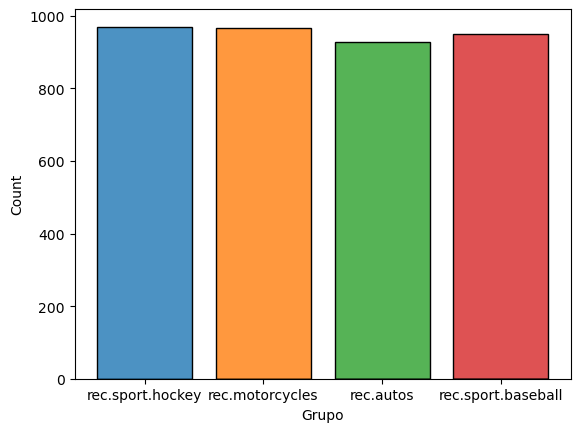

In [32]:
sns.histplot(data=ng_b2, x="Grupo", hue="Grupo", shrink=.8, alpha=.8, legend=False)

In [33]:
embeddings = [texto_a_embedding(doc) for doc in ng_b2['Documento']]

ng_b2['Embedding'] = embeddings

C:\Users\David\AppData\Local\Temp\ipykernel_10832\2624288955.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ng_b2['Embedding'] = embeddings


In [34]:
ng_b2[ng_b2['Embedding'].isnull()]

,id_documento,Grupo,Documento,Target,Embedding
6666,105021,rec.sport.baseball,baseballalways,9,NaN
9125,104905,rec.sport.baseball,bilinsky,9,NaN


In [35]:
ng_b2 = ng_b2.drop(ng_b2[ng_b2['Embedding'].isnull()].index)

In [36]:
ng_b2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3811 entries, 0 to 18265
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_documento  3811 non-null   int64 
 1   Grupo         3811 non-null   object
 2   Documento     3811 non-null   object
 3   Target        3811 non-null   int64 
 4   Embedding     3811 non-null   object
dtypes: int64(2), object(3)
memory usage: 178.6+ KB


In [37]:
ng_b2.to_pickle('20newsgroups_b2_embd_all.pkl')

## B3 NG11/12/13/14

In [38]:
ng_b3 = ng[ng['Target'].isin([11, 12, 13, 14])]

ng_b3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3828 entries, 5 to 18262
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_documento  3828 non-null   int64 
 1   Grupo         3828 non-null   object
 2   Documento     3828 non-null   object
 3   Target        3828 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 149.5+ KB


In [39]:
set(ng_b3['Grupo'])

{'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space'}

<AxesSubplot:xlabel='Grupo', ylabel='Count'>

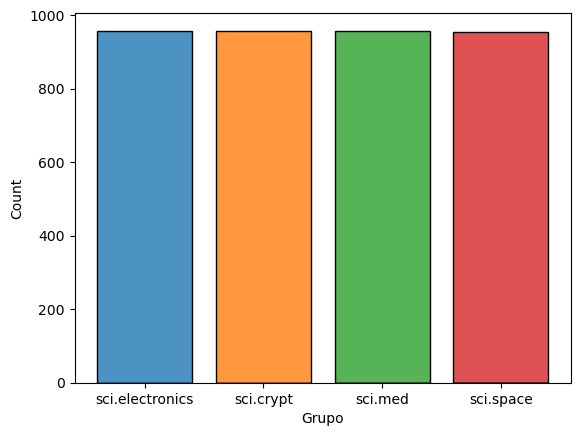

In [40]:
sns.histplot(data=ng_b3, x="Grupo", hue="Grupo", shrink=.8, alpha=.8, legend=False)

In [41]:
ng_b3.head()

,id_documento,Grupo,Documento,Target
5,54198,sci.electronics,high school work lab assistant bunch experimen...,12
11,15596,sci.crypt,history untrustworthy behavoirsic,11
13,59022,sci.med,kirlian imaging faq sciskeptic nice write supp...,13
16,53899,sci.electronics,reply appeal info drive rpm modify bbc compute...,12
17,54203,sci.electronics,year ago victim squirted fair model teletype t...,12


In [42]:
embeddings = [texto_a_embedding(doc) for doc in ng_b3['Documento']]

ng_b3['Embedding'] = embeddings

C:\Users\David\AppData\Local\Temp\ipykernel_10832\3640546857.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ng_b3['Embedding'] = embeddings


In [43]:
ng_b3[ng_b3['Embedding'].isnull()]

,id_documento,Grupo,Documento,Target,Embedding
4459,54092,sci.electronics,ieeegeneral ieeeannounce,12,NaN
4667,53745,sci.electronics,scienergy,12,NaN


In [44]:
ng_b3 = ng_b3.drop(ng_b3[ng_b3['Embedding'].isnull()].index)

In [45]:
ng_b3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3826 entries, 5 to 18262
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_documento  3826 non-null   int64 
 1   Grupo         3826 non-null   object
 2   Documento     3826 non-null   object
 3   Target        3826 non-null   int64 
 4   Embedding     3826 non-null   object
dtypes: int64(2), object(3)
memory usage: 179.3+ KB


In [46]:
ng_b3.to_pickle('20newsgroups_b3_embd_all.pkl')

## B4 NG15/16/17/18/19

In [47]:
ng_b4 = ng[ng['Target'].isin([16, 17, 18, 19])]

ng_b4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3158 entries, 2 to 18258
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_documento  3158 non-null   int64 
 1   Grupo         3158 non-null   object
 2   Documento     3158 non-null   object
 3   Target        3158 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 123.4+ KB


In [48]:
set(ng_b4['Grupo'])

{'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc'}

<AxesSubplot:xlabel='Grupo', ylabel='Count'>

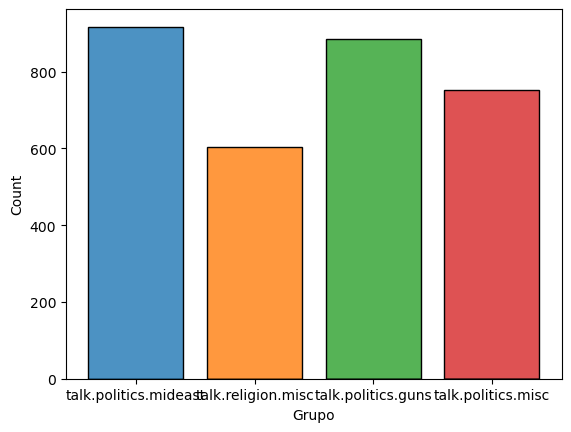

In [49]:
sns.histplot(data=ng_b4, x="Grupo", hue="Grupo", shrink=.8, alpha=.8, legend=False)

In [50]:
ng_b4.head()

,id_documento,Grupo,Documento,Target
2,76120,talk.politics.mideast,finally dream mediterranean area great year ho...,17
9,84236,talk.religion.misc,christian divinity jesus safe jesus christian ...,19
10,83609,talk.religion.misc,blood lamb hard task culture animal blood sacr...,19
12,83506,talk.religion.misc,wilt law honestly word sin restriction kid man...,19
15,76476,talk.politics.mideast,report turkey eyes regional role ankara turkey...,17


In [51]:
embeddings = [texto_a_embedding(doc) for doc in ng_b4['Documento']]

ng_b4['Embedding'] = embeddings

C:\Users\David\AppData\Local\Temp\ipykernel_10832\3670991653.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ng_b4['Embedding'] = embeddings


In [52]:
ng_b4[ng_b4['Embedding'].isnull()]

,id_documento,Grupo,Documento,Target,Embedding
9005,84289,talk.religion.misc,altreligionspam,19,NaN
16644,178690,talk.politics.misc,tesrt,18,NaN
17589,83677,talk.religion.misc,critus,19,NaN


In [53]:
ng_b4 = ng_b4.drop(ng_b4[ng_b4['Embedding'].isnull()].index)

In [54]:
ng_b4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3155 entries, 2 to 18258
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_documento  3155 non-null   int64 
 1   Grupo         3155 non-null   object
 2   Documento     3155 non-null   object
 3   Target        3155 non-null   int64 
 4   Embedding     3155 non-null   object
dtypes: int64(2), object(3)
memory usage: 147.9+ KB


In [55]:
ng_b4.to_pickle('20newsgroups_b4_embd_all.pkl')

## Dos bloques enteros: B10 NG1/2/3/5/8/9/15/17/18/19

In [56]:
ng_b10 = ng[ng['Target'].isin([1, 2, 3, 5, 8, 9, 16, 17, 18, 19])]

In [57]:
set(ng_b10['Grupo'])

{'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.windows.x',
 'rec.motorcycles',
 'rec.sport.baseball',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc'}

In [58]:
ng_b10.groupby('Grupo').size().reset_index(name='n').sort_values(by='n')

,Grupo,n
9,talk.religion.misc,603
8,talk.politics.misc,753
6,talk.politics.guns,885
7,talk.politics.mideast,917
1,comp.os.ms-windows.misc,942
0,comp.graphics,948
5,rec.sport.baseball,949
2,comp.sys.ibm.pc.hardware,963
4,rec.motorcycles,966
3,comp.windows.x,978


<AxesSubplot:xlabel='Grupo', ylabel='Count'>

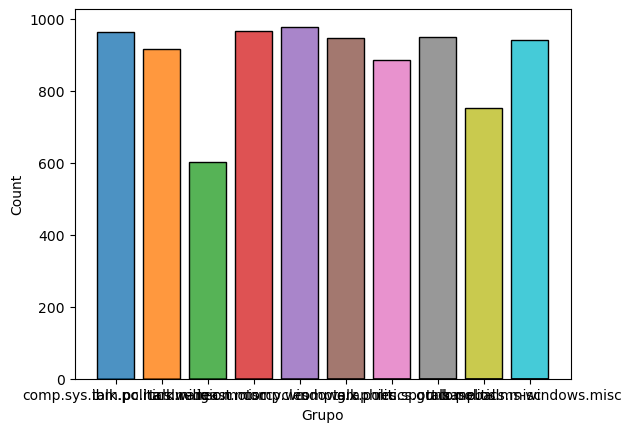

In [59]:
sns.histplot(data=ng_b10, x="Grupo", hue="Grupo", shrink=.8, alpha=.8, legend=False)

In [152]:
dict_b10 = tfidf_embd(ng_b10)

C:\Users\David\AppData\Local\Temp\ipykernel_2024\1757683251.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Embedding'] = embeddings


In [153]:
ng_b10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5338 entries, 3 to 10978
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_documento  5338 non-null   int64 
 1   Grupo         5338 non-null   object
 2   Documento     5338 non-null   object
 3   Target        5338 non-null   int64 
 4   Embedding     5320 non-null   object
dtypes: int64(2), object(3)
memory usage: 250.2+ KB


In [154]:
ng_b10[ng_b10['Embedding'].isnull()]

,id_documento,Grupo,Documento,Target,Embedding
143,9985,comp.os.ms-windows.misc,mgizgizbhjgizmteilvfffrawzqvo mzexfwfpwmwmuulp...,2,NaN
1442,9978,comp.os.ms-windows.misc,mwswwsuwwwwwtwwwxwuw mwwxwawwvawuuuwwwuwaw mww...,2,NaN
1490,9977,comp.os.ms-windows.misc,mcxtmxxcbncexxcxxrbnhkcgocn mysysctsxsnccxsuay...,2,NaN
2835,9990,comp.os.ms-windows.misc,mdpumvbxnttqqgvgppvqqt mttbxomwmuplpdddddddq m...,2,NaN
3091,9980,comp.os.ms-windows.misc,mkkhfngunkrlbtlkitlpkjrnkhairkhbrgwgw mkwjvmgr...,2,NaN
4352,9981,comp.os.ms-windows.misc,mqgpfrfbfbgaaaaaar mpusdbooqxechmprvmjtvpls mp...,2,NaN
4371,9983,comp.os.ms-windows.misc,mnpprcbeftnchijjlbpzqjyjwe mulvvfjrpfxlbvbfxju...,2,NaN
4622,9988,comp.os.ms-windows.misc,mtfffffffffpfffpkngizgkte' ''' mwwizbhjnmyffff...,2,NaN
6077,54380,talk.politics.guns,outofcontrolgif mpubzaynylcjwcqahoaelqrw mphtf...,16,NaN
6108,178690,talk.politics.misc,tesrt,18,NaN


In [155]:
ng_b10 = ng_b10.drop(ng_b10[ng_b10['Embedding'].isnull()].index)

,Palabra,Valor
209,access,16.263734
433,add,10.743238
452,address,20.220700
579,advance,28.603186
779,ago,16.695851
...,...,...
48130,written,10.973914
48136,wrong,20.933922
49489,yeah,11.205732
49492,year,33.795338


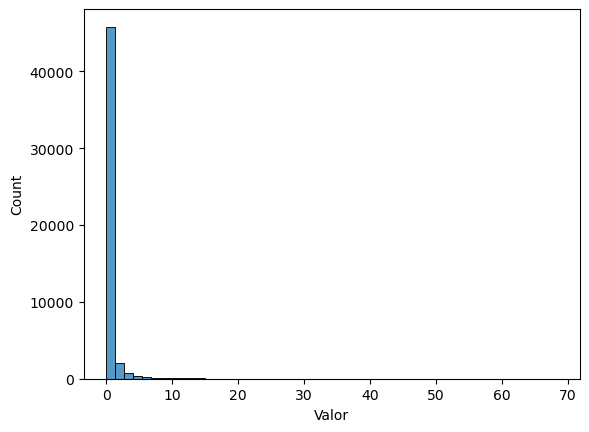

In [156]:
a, b, c = descriptivo(dict_b10)

c

In [157]:
ng_b10.to_pickle('20newsgroups_b10.pkl')

## Muestra total

In [70]:
ng_20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18266 entries, 0 to 18265
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_documento  18266 non-null  int64 
 1   Grupo         18266 non-null  object
 2   Documento     18266 non-null  object
 3   Target        18266 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 570.9+ KB


In [61]:
embeddings = [texto_a_embedding(doc) for doc in ng_20['Documento']]

ng_20['Embedding'] = embeddings

In [62]:
ng_20[ng_20['Embedding'].isnull()]

,id_documento,Grupo,Documento,Target,Embedding
198,76496,misc.forsale,inguiry,6,NaN
1259,68274,comp.windows.x,compwindowsmisc --berry,5,NaN
3754,53401,alt.atheism,test--,0,NaN
4459,54092,sci.electronics,ieeegeneral ieeeannounce,12,NaN
4667,53745,sci.electronics,scienergy,12,NaN
5886,51689,comp.sys.mac.hardware,hdfd -david,4,NaN
6666,105021,rec.sport.baseball,baseballalways,9,NaN
9005,84289,talk.religion.misc,altreligionspam,19,NaN
9125,104905,rec.sport.baseball,bilinsky,9,NaN
12027,10635,comp.os.ms-windows.misc,emmexe,2,NaN


In [79]:
ng_20 = ng_20.drop(ng_20[ng_20['Embedding'].isnull()].index)

In [68]:
ng_20.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18246 entries, 0 to 18265
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_documento  18246 non-null  int64 
 1   Grupo         18246 non-null  object
 2   Documento     18246 non-null  object
 3   Target        18246 non-null  int64 
 4   Embedding     18246 non-null  object
dtypes: int64(2), object(3)
memory usage: 855.3+ KB


In [81]:
ng_20.to_pickle('20newsgroups_embd_all.pkl')